 **2 Programming Question**

In this question, we analyze the factors of median value of owner-occupied homes in 1000 dollars' (medv). The data is stored in boston.csv collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the data set columns:
- crim - per capita rate by town
- zn - proportion of residential land zoned for lots over 25,000 sq.ft.
- indus - proportion of non-retail business acres per town.
- chas - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- nox - nitric oxides concentration (parts per 10 million)
- rm - average number of rooms per dwelling
- age - proportion of owner-occupied units built prior to 1940
- dis - weighted distances to five Boston employment centres
- rad - index of accessibility to radial highways
- tax - full-value property-tax rate per 10,000 dollars
- ptratio - pupil-teacher ratio by town
- b - 1000 ${(B_k − 0.63)}^2$ where ${B}_{k}$ is the proportion of blacks by town
- lstat - \% lower status of the population
- medv - Median value of owner-occupied homes in 1000 dollars'

The goal of this problem is to use appropriate attributes in "crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat" to predict the last attribute "medv".

- **Step 1**

Process incomplete points in the csv file. To avoid the affect of invalid data, drop the row with at least one term of invalid input. 

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("boston.csv")
(m1,n1) = df.shape
df.dropna(how = "any")
(m2,n2) = df.shape
list_of_col = df.columns
print('The total number of data is '+ str(m1) + ', and after cleaning the number becomes ' + str(m2) +'.')



The total number of data is 506, and after cleaning the number becomes 506.


The number does not change after the cleaning. We can conclude that there is no invalid data in the raw file.

The following code calculates the mean and variance of each column.  

In [3]:
for i in range(n1):
    name = list_of_col[i]
    mean = df[name].mean()
    var = df[name].var()
    print('The mean of ' + name +' is '+ str(mean) + ', and the variance of it is '+ str(var)+'.')

The mean of crim is 3.6135235573122535, and the variance of it is 73.98657819906929.
The mean of zn is 11.363636363636363, and the variance of it is 543.9368136813633.
The mean of indus is 11.136778656126504, and the variance of it is 47.064442473682135.
The mean of chas is 0.0691699604743083, and the variance of it is 0.06451297303643481.
The mean of nox is 0.5546950592885372, and the variance of it is 0.013427635718115326.
The mean of rm is 6.284634387351787, and the variance of it is 0.4936708502211095.
The mean of age is 68.57490118577078, and the variance of it is 792.358398505069.
The mean of dis is 3.795042687747034, and the variance of it is 4.434015137382066.
The mean of rad is 9.549407114624506, and the variance of it is 75.81636598442468.
The mean of tax is 408.2371541501976, and the variance of it is 28404.759488122803.
The mean of ptratio is 18.455533596837967, and the variance of it is 4.686989120651217.
The mean of b is 356.67403162055257, and the variance of it is 8334.

We can see that the variance is somewhat related to the mean value. That is, variance is more likely to be large if mean is large. In this question, it is difficult to speculate the relationship between these factors and medv only according to their mean and variance values. Thus, the following code calculates the correlation between each factors and medv.

In [4]:
correlations  = df.corr()
correlations['medv']

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

Here, we can see that the absolute value of correlation of indus(-0.48), rm(0.70), ptratio(-0.51), lstat(-0.74) is close to 0.5, which means these factors may be fairly related to medv. Furthermore, lstat is likely to be the most relevant attribute for medv. 

- **Step 2**

Here, we visualize the medv distributions over each attributes.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

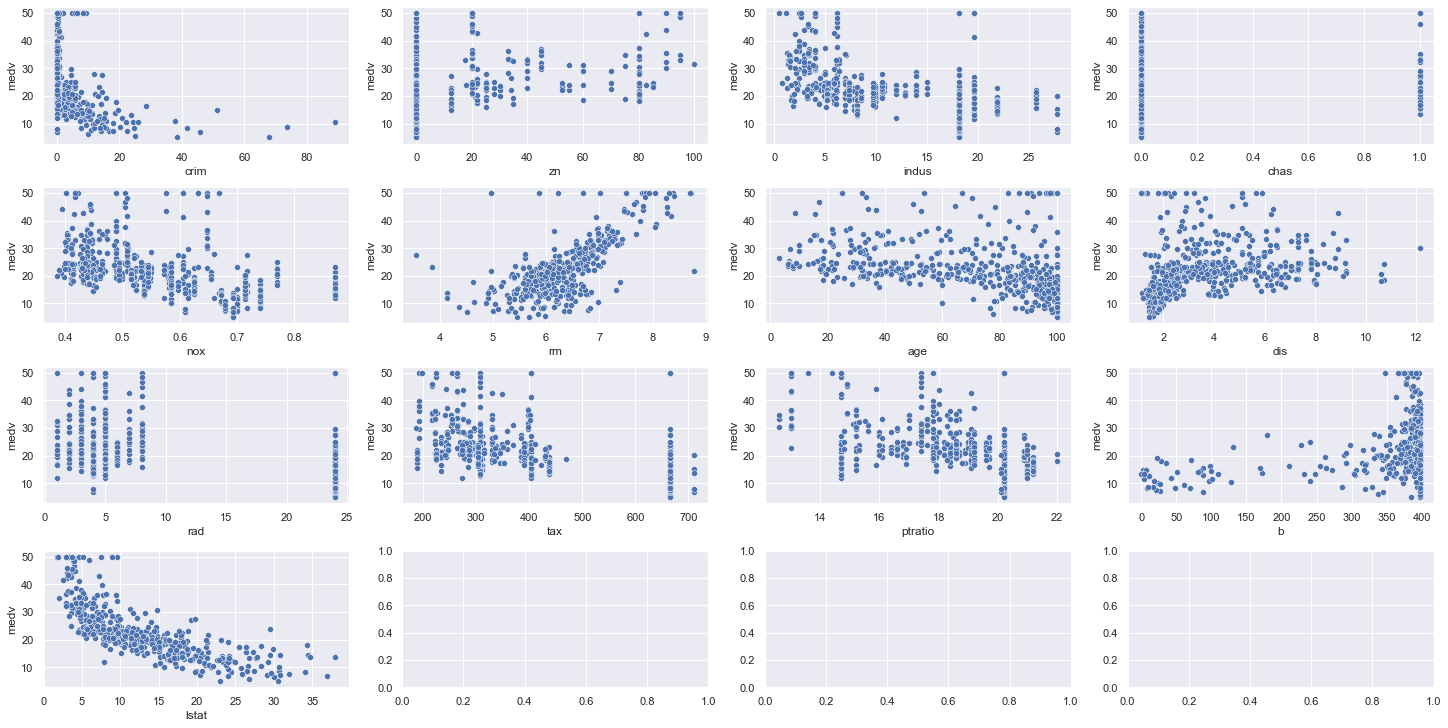

In [6]:
fig, ax = plt.subplots(4,4,constrained_layout=True, figsize=(20, 10))
for i in range(n1-1):
    name = list_of_col[i]
    q = i//4
    r = i%4
    axeSub = sns.scatterplot(x = df[name], y = df['medv'],data = df, ax = ax[q][r])

According to the figure, we can conclude that
- crim gathers near (0,20);
- most data of zn is zero;
- indus looks possible to do linear regression;
- chas is in a Bernoulli distribution;
- nox looks possible to do linear regression;
- rm and lstst seem relevant to medv;
- age and dis distribute in a specific area in their graph;
- rad takes specific values;
- b mostly distributes near 400.

- **Step 3** 

Plot a figure to show the pairwise correlation of the data.

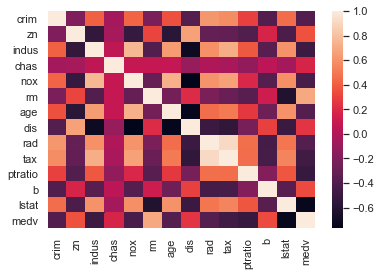

In [7]:
sns.heatmap(correlations)
plt.show()

Here we can see that indus, rm, ptratio, and lstat have a strong correlation with medv. Moreover, except for (rm, lstat) pair, any other factors have a relatively low correlation with each other, which shows that it is possible to do linear regression with these factors.

- **Step 4**

The following code firstly scale the possible factors column data in [0, 1] and then plot the relevance of these columns against medv with 95% confidence interval.

The 95% confidence interval is shown in the shadow in each graph.

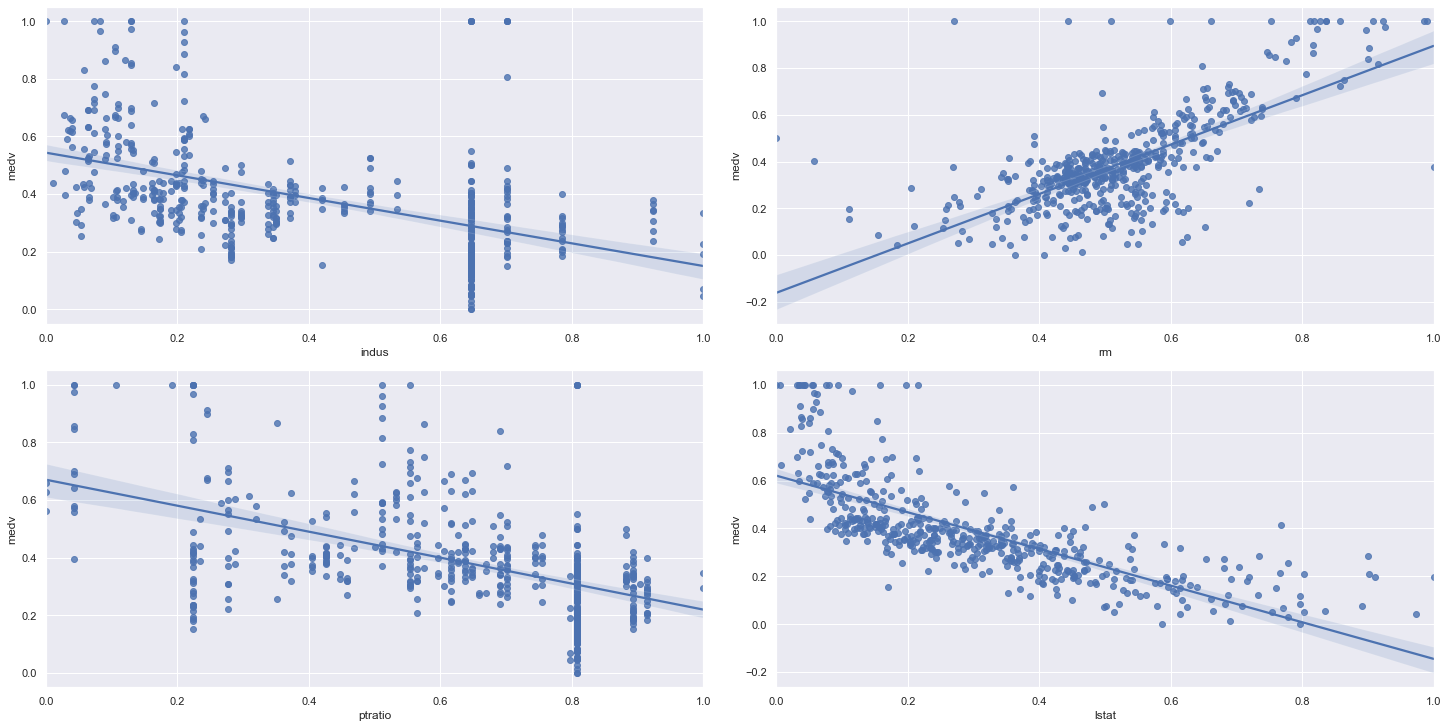

In [8]:
from sklearn import preprocessing
list_of_pre = ["indus", "rm", "ptratio", "lstat", "medv"]
X = df[list_of_pre]
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X)
ind = [i for i in range(len(X_train_minmax))]
new_X = pd.DataFrame(data = 0, index = ind, columns = list_of_pre)
for i in range(len(list_of_pre)):
    name = list_of_pre[i]
    for j in range(len(X_train_minmax)):
        data = X_train_minmax[j][i]
        new_X.loc[j,name] = data
fig, ax = plt.subplots(2,2,constrained_layout=True, figsize=(20, 10))
for i in range(len(list_of_pre)-1):
    name = list_of_pre[i]
    q = i//2
    r = i%2
    axeSub = sns.regplot(x = new_X[name], y = new_X['medv'],data = df, ax = ax[q][r], ci = 95)


- **Step 5**

Randomly split the data into two parts, one contains 80% of the samples and the other contains 20% of the samples. Use the first part as training data and train a linear regression model and make prediction on the second part with gradient descent methods. Report the training error and testing error in terms of RMSE. 

Linear regression is to find the best solution with the smallest least square error, i. e., $\frac{1}{m} \sum_{i = 1}^{m}{(f_{\textbf{w},b}  (\textbf{x}_i) - y_i)^2}$. This procedure can be represented by finding the coefficient colcumn $\hat{w}$ as below:
$$ \hat{w} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}y$$
where $\textbf{X} = [(1, \textbf{x}_1^T);...; (1, \textbf{x}_m^T)] $.

However, in most cases we do not use the exact soultion. Instead we use iteration algorithm to simulate the solution. In this question, we use gradient descent to solve it. The iteration logic is shown below

$$\textbf{w}\leftarrow \textbf{w} - \alpha \textbf{X}^{T}(\textbf{Xw - y}) $$

Here we define the learning rate($\alpha$) to be 0.001, and number of iterations of gradient decent to be 2000. We use RMSE to represent the training error and testing error, and RMSE is defined by
$$ RMSE = \sqrt{\frac{\sum_{i = 1}^{n}{(y_i - \hat y_i)^2}}{n}} $$
where $y_i$ is the ith real value of medv, $\hat y_i$ is the ith predicted value of medv, and n is the total number of data.

According to previous analysis, we finally choose "indus", "rm", "ptratio",and "lstat" as four indicators to predict the value of medv. Furthermore, we plot the loss curve in the training data. We define loss as below

$$ loss = \sum_{i = 1}^{n}{(y_i - \hat y_i)^2} $$
where $y_i$ is the ith real value of medv, $\hat y_i$ is the ith predicted value of medv, and n is the total number of data.

In [11]:
import math
list_of_factors = ["indus", "rm", "ptratio", "lstat"]
df = df[list_of_pre]

In [14]:
def GenerateSample(df, ratio):
    m = len(df)
    training = df.sample(n = int(m*ratio))
    testing = df[~df.index.isin(training.index)]
    x_data_training = training[list_of_factors]
    y_data_training = training["medv"]
    x_data_testing = testing[list_of_factors]
    y_data_testing = testing["medv"]
    x_data_training['ones']=1
    x_data_testing['ones']=1
    X_train=x_data_training.to_numpy()
    y_train=y_data_training.to_numpy().reshape((len(y_data_training),1))
    X_test=x_data_testing.to_numpy()
    y_test=y_data_testing.to_numpy().reshape((len(y_data_testing),1))
    return X_train, y_train, X_test, y_test

def GD(X_train, y_train, step_length, iterations, judgment = True):
    w = np.zeros((5,1))
    m = len(X_train)
    loss=[]
    Xty = np.matmul(np.transpose(X_train),y_train).reshape((5,1))
    XtX = np.matmul(np.transpose(X_train),X_train) 
    for i in range(iterations):
        gradient = (np.matmul(XtX,w)-Xty)
        grad_norm=np.linalg.norm(gradient)
        gradient = np.divide(gradient,grad_norm)
        w-=np.multiply(gradient,step_length)
        norm = np.linalg.norm(np.matmul(X_train,w)-y_train)
        loss.append(norm**2)
    if judgment:
        sns.scatterplot([i for i in range(len(loss))], y = loss,)
    return w, loss

def compute_RMSE(w, X, y):
    total_error = np.linalg.norm(np.matmul(X,w)- y)
    dem = math.sqrt(len(X))
    result = total_error/dem
    return result

def main(l, df, ratio, j = False):
    t = len(l)
    for i in range(t):
        print("This is No. %d iteration." %(i+1))
        learning_rate, n_iterations = l[i][1], l[i][0]
        print("Learning rate = %.4f, and number of iterations = %d." %(learning_rate,n_iterations))
        X_train, y_train, X_test, y_test = GenerateSample(df, ratio)
        w, loss = GD(X_train, y_train, learning_rate, n_iterations, judgment =j)
        training_RMSE = compute_RMSE(w, X_train, y_train)
        testing_RMSE = compute_RMSE(w, X_test, y_test)
        print("The RMSE for the training set is %.4f, and the RMSE for the testing set is %4f." %(training_RMSE,testing_RMSE))

This is No. 1 iteration.
Learning rate = 0.0010, and number of iterations = 2000.
The RMSE for the training set is 8.0276, and the RMSE for the testing set is 8.233739.


d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


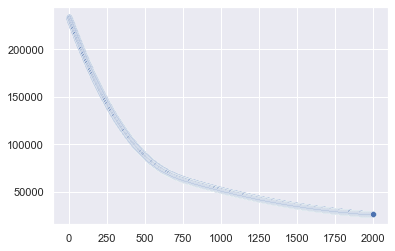

In [15]:
l = [[2000,0.001]]
main(l, df, 0.8, True)

- **Step 6**

Repeat the splitting, training, and testing for 10 times with different parameters such as step size, iteration steps, etc. Use a loop and print the RMSEs in each trial. Analyze the influence of different parameters on RMSE.

In each loop, parameters are shown below:

1. learning rate = 0.001, and number of iterations of gradient decent = 1000
2. learning rate = 0.01, and number of iterations of gradient decent = 1000
3. learning rate = 0.01, and number of iterations of gradient decent = 1500
4. learning rate = 0.01, and number of iterations of gradient decent = 2000
5. learning rate = 0.001, and number of iterations of gradient decent = 1500
6. learning rate = 0.001, and number of iterations of gradient decent = 2000
7. learning rate = 0.1, and number of iterations of gradient decent = 1000
8. learning rate = 0.1, and number of iterations of gradient decent = 1500
9. learning rate = 0.1, and number of iterations of gradient decent = 2000
10. learning rate = 0.001, and number of iterations of gradient decent = 10000

In [16]:
l = [[1000,0.001], [1000,0.01], [1500,0.01], [2000,0.01], [1500,0.001], [2000,0.001], [1000, 0.1], [1500,0.1], [2000,0.1], [10000,0.001]]
main(l, df, 0.8)

This is No. 1 iteration.
Learning rate = 0.0010, and number of iterations = 1000.
The RMSE for the training set is 11.3170, and the RMSE for the testing set is 12.180034.
This is No. 2 iteration.
Learning rate = 0.0100, and number of iterations = 1000.
The RMSE for the training set is 5.0199, and the RMSE for the testing set is 6.501628.
This is No. 3 iteration.
Learning rate = 0.0100, and number of iterations = 1500.
The RMSE for the training set is 5.1683, and the RMSE for the testing set is 5.926713.
This is No. 4 iteration.
Learning rate = 0.0100, and number of iterations = 2000.
The RMSE for the training set is 5.3551, and the RMSE for the testing set is 5.218842.
This is No. 5 iteration.
Learning rate = 0.0010, and number of iterations = 1500.
The RMSE for the training set is 9.5834, and the RMSE for the testing set is 8.962955.
This is No. 6 iteration.
Learning rate = 0.0010, and number of iterations = 2000.
The RMSE for the training set is 8.2480, and the RMSE for the testing s

We present the RMSEs in the following table. The title of row represents the learning rate and the title of column represents the number of iterations.

| RMSE for training/ RMSE for testing  | 0.001 | 0.01 | 0.1 |
| :------: | :------: | :------: |  :------: |
| 1000 | 11.3170/ 12.180034 | 5.0199/ 6.501628 |  5.4267/ 5.779487 |
| 1500 | 9.5834/ 8.962955 | 5.1683/ 5.926713 | 5.1823/ 6.636925 |
| 2000 | 8.2480/ 7.305436 | 5.3551/ 5.218842 | 5.4432/ 5.733796 |
| 10000 | 5.1348/ 5.981274 | - | - | 

We can see that, if the learning rate is too small(0.001), the performance becomes better as the number of iteration increases. It is consistent to the common sense. To achieve the better predict model, small step length requires more iterations. If the learning rate is enough, it will get to the good model very quickly. However, since their step length is not so small, it faces the problem of overfitting. When the learning rate is 0.1, the increase of iterations form 1000 to 1500 causes the decrease on RMSE for training but increase on RMSE for testing. This shows that the model is overfitted. Generally, the model makes a good prediction. 